In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../../src')
from utils import preprocession as prep
from utils import visualization as vis

from sklearn.decomposition import PCA

import WassersteinTSNE as WT
from numpy.random import Generator, PCG64
rng = Generator(PCG64(seed=0))

## Load Data

In [2]:
# Create the folder if it doesn't exist
folder_name = "../../data/Smartvote"
os.makedirs(folder_name, exist_ok=True)

In [3]:
candidates = pd.read_excel('~/Data/Smartvote/election19/smartvote_2019_NR_candidates.xlsx')
statements = pd.read_excel('~/Data/Smartvote/election19/smartvote_2019_NR_candidates.xlsx', sheet_name='Fragen 2019')

In [4]:
candidates

,ID_election,ID_candidate,firstname,lastname,gender,year_of_birth,zip,city,country,language,...,comment_3470,comment_3471,comment_3472,comment_3473,comment_3474,comment_3475,comment_3476,comment_3477,comment_3478,comment_3479
0,222,46165,Yanik,Wermuth,m,2001,3427.0,Utzenstorf,Schweiz,de_CH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,222,46207,Johanna,Küng,f,2001,6005.0,Luzern,Schweiz,de_CH,...,NaN,NaN,NaN,NaN,Aber je nach dem anders eingesetzt als jetzt.,NaN,NaN,NaN,NaN,"Aber effektivere Varianten wären, z.B durch ei..."
2,222,46208,Mirjam,Reinhard,f,2001,6048.0,Horw,Schweiz,de_CH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,222,46209,Teresa,Mestre Sewing,f,2001,6023.0,Rothenburg,Schweiz,de_CH,...,Konzernverantwortung soll auch im Ausland gelten.,NaN,"Entwicklungshilfe nur, wenn sie wirklich der B...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,222,46257,Nils,Jacobi,m,2001,6343.0,Rotkreuz,Schweiz,de_CH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,222,50659,Maria,Bumann,f,1933,4058.0,Basel,Schweiz,de_CH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4659,222,48770,Jacques,Neirynck,m,1931,1024.0,Ecublens VD,Schweiz,fr_CH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4660,222,50336,Myrian,Kobler-Betancourt,f,1971,4153.0,Reinach,Schweiz,de_CH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4661,222,50542,Stefan,Rusch,m,1975,9525.0,Lenggenwil,Schweiz,de_CH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def plotParties(E, title='', ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(6,6))
    X,Y = E.values.T
    ax.scatter(X,Y, c=E.index, s=0.1)
    ax.set_title(title)
    for color, data in E.groupby(level=0):
        if len(data) > 1:
            G = WT.GaussianDistribution().estimate(data.values)
            x,y = G.mean
            ax.scatter(x,y, c=color, s=50, zorder=10, label=prep.partynames[color])
            WT.plotGaussian(G, size=0, STDS=[2], color=color, lw=1.5, ax=ax)
    _ = ax.legend(ncol=4)
    ax.set_aspect('equal')
    return ax

In [6]:
### fastTrack
fastTrack = ['answer_3414', 'answer_3427', 'answer_3432', 'answer_3412',
           'answer_3441', 'answer_3449', 'answer_3416', 'answer_3420',
           'answer_3392', 'answer_3431', 'answer_3463', 'answer_3417',
           'answer_3399', 'answer_3443', 'answer_3448', 'answer_3398',
           'answer_3451', 'answer_3430', 'answer_3418', 'answer_3428',
           'answer_3435', 'answer_3468', 'answer_3389', 'answer_3436',
           'answer_3388', 'answer_3453', 'answer_3466', 'answer_3440',
           'answer_3469', 'answer_3454', 'answer_3442']

### preprocessing
idx_mask = (candidates.n_answers == 75) & (candidates.party_short.isin(list(prep.partycolors.keys())))
col_mask = candidates.columns.str.startswith('answer_')

data = (candidates.loc[idx_mask, col_mask]/100).reset_index(drop=True).reset_index(drop=True)

### statements
titles = data.columns.map(dict(zip('answer_'+statements['ID_question'].astype(str), statements['question_en'])))
statements = pd.DataFrame({'name': data.columns,
                           'number': range(len(data.columns)),
                           'rapid': data.columns.isin(fastTrack),
                           'mean': data.mean(),
                           'std': data.std(),
                           'question':titles}
                           ).set_index('number')

statements.to_csv(f'{folder_name}/statements.csv')

In [28]:
data.columns = range(len(data.columns))
data

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.17,0.17,0.83,1.00,1.00,0.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,0.00,0.50,0.75,0.75,0.00,1.00,1.00
1,0.50,0.33,0.17,0.00,0.75,0.00,0.33,0.75,0.00,0.25,...,0.75,1.00,0.50,0.50,0.75,1.00,0.50,0.75,1.00,0.75
2,1.00,0.67,0.17,0.25,0.75,0.00,0.50,1.00,1.00,0.25,...,1.00,1.00,0.50,0.50,0.50,1.00,0.25,0.00,1.00,0.50
3,0.00,0.17,0.33,1.00,1.00,0.00,0.83,0.00,1.00,1.00,...,1.00,0.75,0.75,0.25,0.50,1.00,0.75,0.00,1.00,0.75
4,0.17,0.67,0.83,0.25,0.75,0.00,0.17,0.00,1.00,1.00,...,1.00,1.00,0.75,0.50,0.50,0.75,0.50,0.00,0.50,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,0.17,0.17,0.67,0.75,0.00,0.00,1.00,0.00,0.75,0.75,...,1.00,1.00,0.75,0.50,0.50,0.75,0.75,0.25,0.75,0.25
1908,0.00,0.00,0.00,1.00,0.75,0.00,1.00,0.00,1.00,1.00,...,1.00,1.00,1.00,0.25,0.50,0.75,0.75,0.25,1.00,0.25
1909,1.00,0.00,1.00,0.75,0.00,0.25,0.00,0.75,1.00,0.25,...,0.00,1.00,0.50,0.75,1.00,1.00,1.00,0.75,1.00,0.25
1910,0.83,0.00,0.00,1.00,0.00,0.00,0.33,1.00,1.00,1.00,...,1.00,1.00,0.50,0.25,0.50,0.75,0.50,0.50,0.75,0.75


In [7]:
round_data = round(data)
round_data

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1908,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1909,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1910,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [8]:
labels = candidates.loc[idx_mask].party_short.reset_index(name='party')
labels['color'] = labels.party.map(prep.partycolors)
labels['party_id'] = labels.party.map(prep.partyclasses)
labels['yays'] = round(data).sum(axis=1).astype(int)
labels['nays'] = len(data.columns) - labels['yays']

## Train and test data

In [9]:
test_mask = rng.binomial(1, 0.15, labels.shape[0]).astype(bool)

In [10]:
labels.loc[test_mask].to_csv(f'{folder_name}/test_candidates.csv')
labels.loc[~test_mask].to_csv(f'{folder_name}/train_candidates.csv')

## PCA Embedding

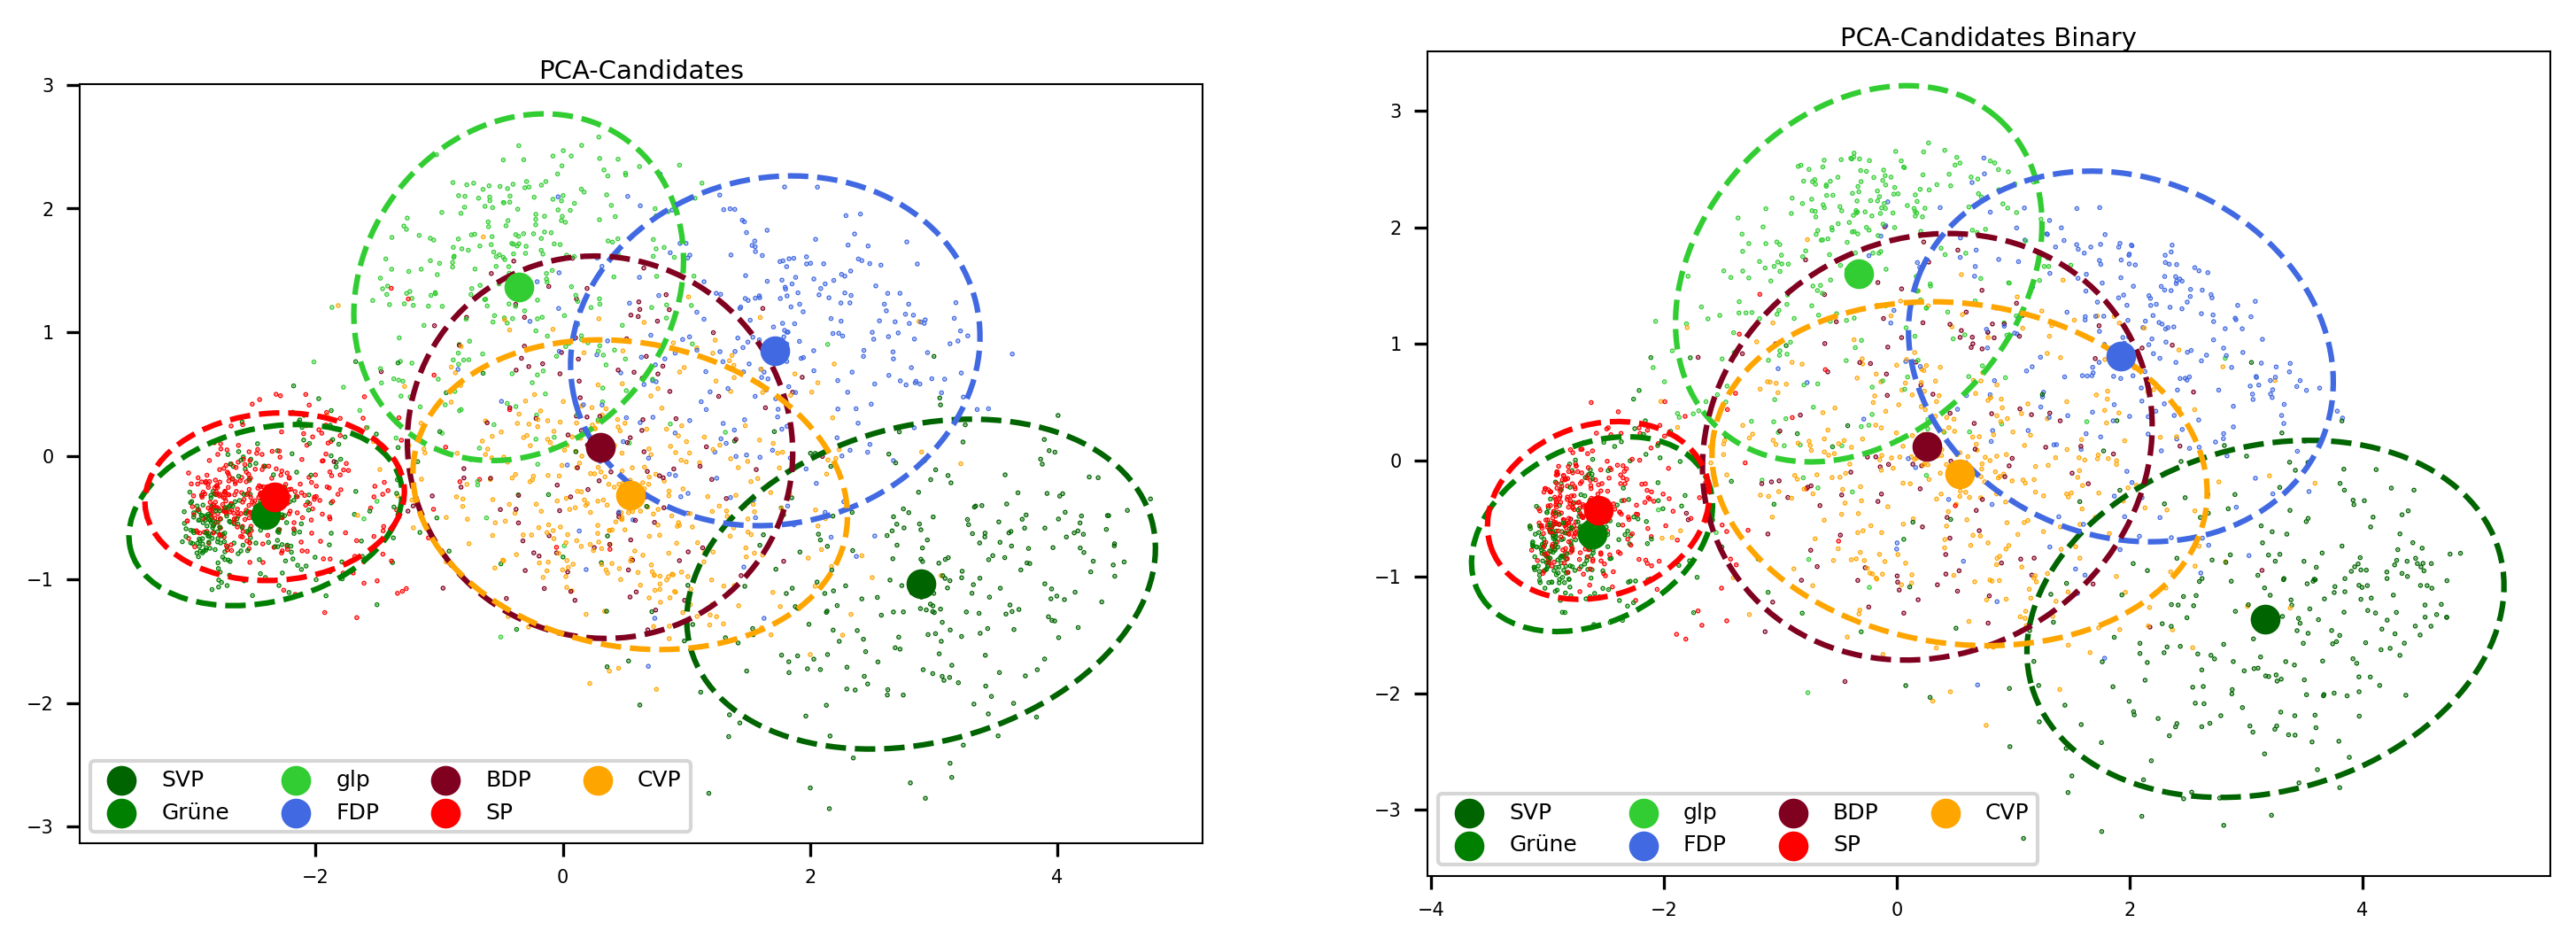

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

pca = PCA(n_components=2)
X = pca.fit_transform(data)
E = pd.DataFrame(X@WT.MirrorMatrix([-1,0]),
                 index = labels.color, 
                 columns=['X','Y'])
_ = plotParties(E, 'PCA-Candidates', ax1)

pca = PCA(n_components=2)
X = pca.fit_transform(round_data)
E = pd.DataFrame(X@WT.MirrorMatrix([-1,0]),
                 index = labels.color, 
                 columns=['X','Y'])
_ = plotParties(E, 'PCA-Candidates Binary', ax2)

## Sparse Reactions

In [12]:
sub_folder_bin = f'{folder_name}/Binary'
os.makedirs(sub_folder_bin, exist_ok=True)
sub_folder_ori = f'{folder_name}/Original'
os.makedirs(sub_folder_ori, exist_ok=True)

for p in range(0,100,10):
    reactions_missing = pd.DataFrame(data.apply(prep.sparsen, p=p/100, generator=rng, axis=1, result_type='expand'),
                                     columns=data.columns, index=data.index)

    reactions_missing.loc[test_mask].to_csv(f'{sub_folder_ori}/test_reactions_{p}.csv')
    reactions_missing.loc[~test_mask].to_csv(f'{sub_folder_ori}/train_reactions_{p}.csv')

    round(reactions_missing).loc[test_mask].to_csv(f'{sub_folder_bin}/test_reactions_{p}.csv')
    round(reactions_missing).loc[~test_mask].to_csv(f'{sub_folder_bin}/train_reactions_{p}.csv')

### Check Everything

In [13]:
loaded_data = pd.read_csv(f'{sub_folder_bin}/train_reactions_90.csv', index_col=0)
loaded_data.columns = map(int, loaded_data.columns)
loaded_data

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,1.0
2,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
(~loaded_data.isna()).sum(axis=0).min()

132